In [1]:
rm(list = ls())
library(Seurat)
library(ggplot2)
source('/mnt/HDD1/Work_min/Celltype_R/lib_cell_type_identifiers_v04.R')

Attaching SeuratObject

Attaching sp

Creating a generic function for ‘toJSON’ from package ‘jsonlite’ in package ‘googleVis’



In [2]:
adata_t <- read_h5ad("/mnt/HDD1/Work_min/Mouse/Data/Hanyang/Markercount/AcuteColitis1.h5ad")

In [3]:
library(Seurat)
library(SingleCellExperiment)

In [4]:
adata_t

AnnData object with n_obs × n_vars = 6594 × 18988
    obs: 'Sample ID', 'n_genes', 'cell_type_subset_pred', 'cell_type_minor_pred', 'cell_type_major_pred'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [5]:
adata_X <- adata_t$to_df()
adata_obs <- adata_t$obs
seurat.obj <- CreateSeuratObject(count = t(adata_X), meta.data = adata_obs)

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Sample.IDn_genescell_type_subset_predcell_type_minor_predcell_type_major_pred; see ?make.names for more details on syntax validity"


In [6]:
seurat <- NormalizeData(seurat.obj, normalization.method = "LogNormalize")

In [7]:
seurat <- FindVariableFeatures(seurat, nfeatures = 1000) # immune cell만 있어서 1000, 복잡하면 2000개 이상 사용

In [8]:
all.genes <- rownames(seurat)
seurat <- ScaleData(seurat, features = all.genes)

seurat <- RunPCA(seurat, features = VariableFeatures(seurat))

Centering and scaling data matrix

PC_ 1 
Positive:  Lcp1, Coro1a, Cd52, Cd74, Slfn2, H2-Aa, H2-Eb1, H2-Ab1, Cytip, Arhgdib 
	   Malt1, Plek, Traf1, Cd83, Itga6, Flt1, Cd93, Ctss, Plvap, H2-DMa 
	   Cdh5, Fabp4, Cybb, Rasip1, Mmrn2, Ptprb, Samsn1, Adgrf5, Plaur, Podxl 
Negative:  Col3a1, Col1a1, Dcn, Fstl1, Crispld2, Lum, Serpina3n, Igfbp4, Mgp, Mt1 
	   Meg3, Postn, Col14a1, Sfrp1, Spon2, C3, Lgi2, Ogn, Ccl11, C4b 
	   Mt2, S100a6, Rbp1, Scn7a, Nupr1, Tnfaip6, Lox, Lpl, Adh1, Igf1 
PC_ 2 
Positive:  Cd52, Coro1a, Cd74, H2-Eb1, H2-Aa, H2-Ab1, Cytip, Plek, Cd83, Ctss 
	   Lcp1, H2-DMa, Cybb, Arhgdib, Ighm, Cd79a, Traf1, Ccr7, Bcl2a1b, Napsa 
	   Tyrobp, Ms4a1, H2-DMb1, Hmgb2, Spi1, Tpd52, Igkc, Cd79b, Ifi30, Lmnb1 
Negative:  Flt1, Plvap, Cdh5, Adgrf5, Fabp4, Tm4sf1, Mmrn2, Podxl, Rasip1, Kdr 
	   Apold1, Ptprb, Egfl7, Emcn, Slco2a1, Rnd1, Sox7, Adgrl4, Cd93, Bcr 
	   Slfn5, Pcdh17, Ace, Robo4, Itga6, Arap3, Iigp1, Sox18, Upp1, Ctla2a 
PC_ 3 
Positive:  Krt8, Lgals4, Cldn7, Epcam, Oit1,

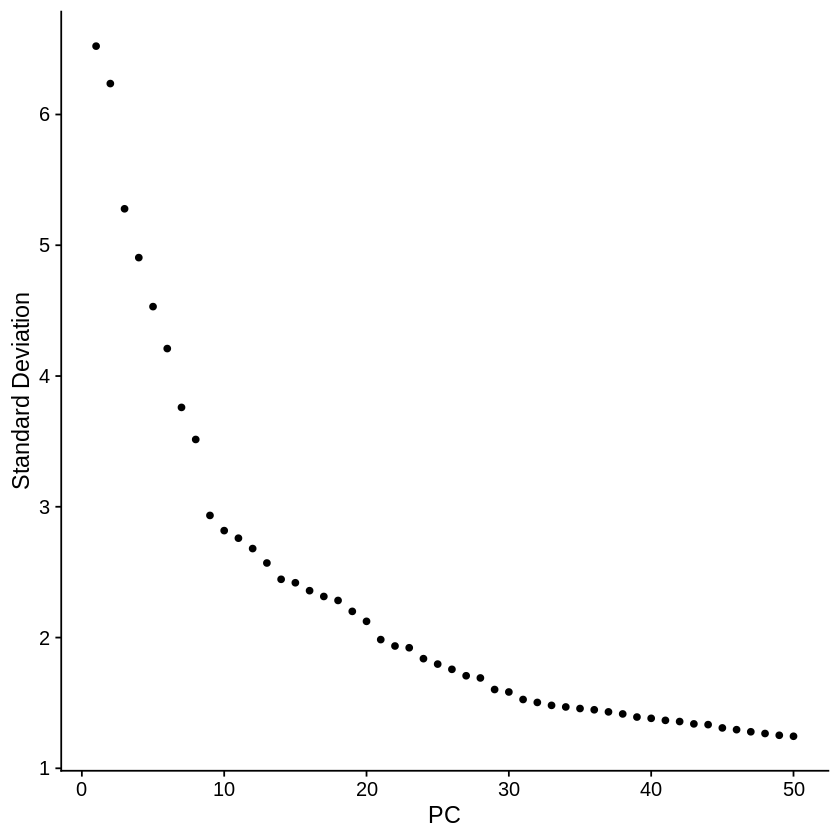

In [9]:
ElbowPlot(seurat, ndims = 50)

In [71]:
PCs <- 20

seurat <- FindNeighbors(seurat,
                        dims = 1:PCs)
 # resolution이 높을 수록 cluster가 많아짐.

Computing nearest neighbor graph

Computing SNN



In [72]:
seurat <- FindClusters(seurat,
                       resolution = 0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6594
Number of edges: 231072

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9743
Number of communities: 10
Elapsed time: 0 seconds


In [73]:
seurat <- RunUMAP(seurat, dims = 1:PCs)
seurat <- RunTSNE(seurat, dims = 1:PCs)

15:18:23 UMAP embedding parameters a = 0.9922 b = 1.112

15:18:23 Read 6594 rows and found 20 numeric columns

15:18:23 Using Annoy for neighbor search, n_neighbors = 30

15:18:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:18:24 Writing NN index file to temp file /tmp/RtmpAW0npS/file1d7b71358e7c

15:18:24 Searching Annoy index using 1 thread, search_k = 3000

15:18:25 Annoy recall = 100%

15:18:26 Commencing smooth kNN distance calibration using 1 thread

15:18:28 Initializing from normalized Laplacian + noise

15:18:28 Commencing optimization for 500 epochs, with 280480 positive edges

15:18:34 Optimization finished



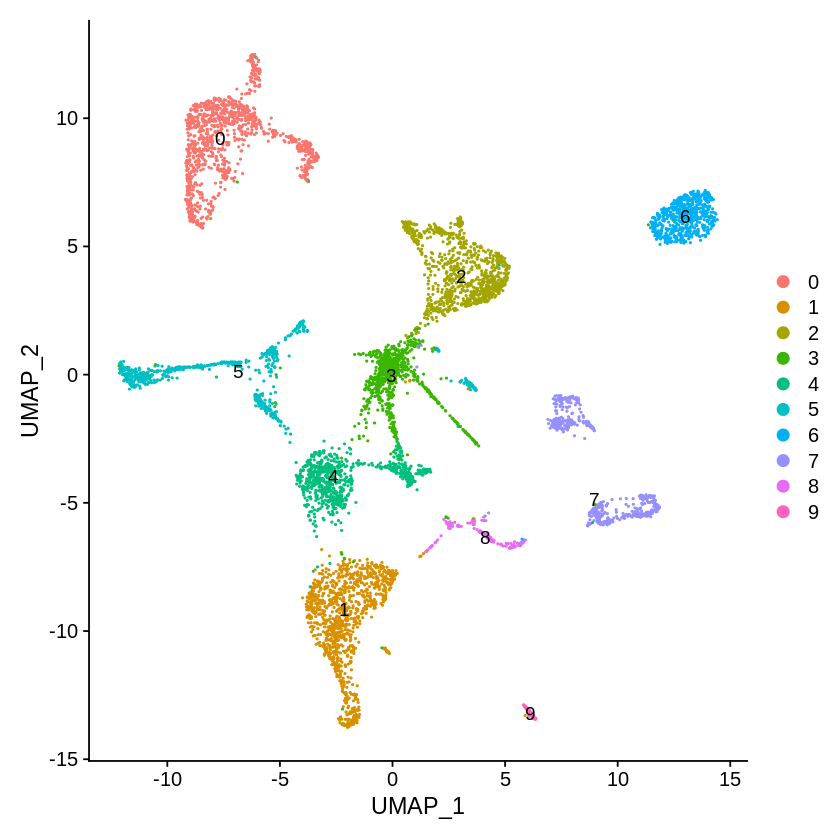

In [74]:
DimPlot(seurat, label=TRUE) # reduction으로 tsne 등 확인 가능

In [14]:
seurat.markers <- FindAllMarkers(seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [15]:
seurat.markers

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Fabp4,0,4.536963,0.950,0.145,0,0,Fabp4
Plvap,0,4.291006,0.926,0.126,0,0,Plvap
Flt1,0,3.981214,0.909,0.067,0,0,Flt1
Tm4sf1,0,3.379036,0.914,0.242,0,0,Tm4sf1
Pecam1,0,3.245100,0.908,0.109,0,0,Pecam1
Slco2a1,0,3.197140,0.787,0.069,0,0,Slco2a1
Podxl,0,3.174335,0.834,0.045,0,0,Podxl
Rnd1,0,3.104005,0.785,0.092,0,0,Rnd1
Apold1,0,3.011347,0.851,0.102,0,0,Apold1


In [16]:
# seurat.markers <- seurat.markers[(names(seurat.markers) %in% c("cluster", 'p_val'))]

In [17]:
c0 <- seurat.markers[,"cluster"] == 0
c1 <- seurat.markers[,"cluster"] == 1
c2 <- seurat.markers[,"cluster"] == 2
c3 <- seurat.markers[,"cluster"] == 3
c4 <- seurat.markers[,"cluster"] == 4
c5 <- seurat.markers[,"cluster"] == 5
c6 <- seurat.markers[,"cluster"] == 6
c7 <- seurat.markers[,"cluster"] == 7
c8 <- seurat.markers[,"cluster"] == 8
c9 <- seurat.markers[,"cluster"] == 9

In [ ]:
# for(i in unique(seurat.markers$cluster)){
#     print(i)
# }

In [23]:
marker.genes <- list()

In [28]:
marker.genes <- append(head(seurat.markers[c0,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c1,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c2,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c3,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c4,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c5,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c6,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c7,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c8,], n = 3)$gene, marker.genes)
marker.genes <- append(head(seurat.markers[c9,], n = 3)$gene, marker.genes)

In [29]:
marker.genes

[[1]]
[1] "Lyve1"

[[2]]
[1] "Mmrn1"

[[3]]
[1] "Reln"

[[4]]
[1] "Mki67"

[[5]]
[1] "Pclaf"

[[6]]
[1] "Cenpf"

[[7]]
[1] "Lyz2"

[[8]]
[1] "Tyrobp"

[[9]]
[1] "Aif1"

[[10]]
[1] "Ighm"

[[11]]
[1] "Cd79a"

[[12]]
[1] "H2-Aa"

[[13]]
[1] "Rgs5"

[[14]]
[1] "Tagln"

[[15]]
[1] "Acta2"

[[16]]
[1] "Adamdec1"

[[17]]
[1] "Col18a1"

[[18]]
[1] "Sfrp1"

[[19]]
[1] "mt-Co3"

[[20]]
[1] "mt-Nd4"

[[21]]
[1] "mt-Atp6"

[[22]]
[1] "Emb"

[[23]]
[1] "Vps37b"

[[24]]
[1] "Ikzf2"

[[25]]
[1] "C3"

[[26]]
[1] "Dcn"

[[27]]
[1] "Lum"

[[28]]
[1] "Fabp4"

[[29]]
[1] "Plvap"

[[30]]
[1] "Flt1"

[[31]]
[1] "Fabp4"

[[32]]
[1] "Plvap"

[[33]]
[1] "Flt1"

[[34]]
[1] "Fabp4"

[[35]]
[1] "Plvap"

[[36]]
[1] "Flt1"

[[37]]
[1] "Fabp4"

[[38]]
[1] "Plvap"

[[39]]
[1] "Flt1"

[[40]]
[1] "Fabp4"

[[41]]
[1] "Plvap"

[[42]]
[1] "Flt1"

[[43]]
[1] "Fabp4"

[[44]]
[1] "Plvap"

[[45]]
[1] "Flt1"

[[46]]
[1] "Fabp4"

[[47]]
[1] "Plvap"

[[48]]
[1] "Flt1"

[[49]]
[1] "Fabp4"

[[50]]
[1] "Plvap"

[[51]]
[1] "Flt1"

[[52]]
[1] "Fabp4"

[[53]]
[1] "Plvap"

[[54]]
[1] "Flt1"

[[55]]
[1] "Fabp4"

[[56]]
[1] "Plvap"

[[57]]
[1] "Flt1"

[[58]]
[1] "Fabp4"

[[59]]
[1] "Plvap"

[[60]]
[1] "Flt1"

[[61]]
[1] "Fabp4"

[[62]]
[1] "Plvap"

[[63]]
[1] "Flt1"

[[64]]
[1] "Fabp4"

[[65]]
[1] "Plvap"

[[66]]
[1] "Flt1"

[[67]]
[1] "Fabp4"

[[68]]
[1] "Plvap"

[[69]]
[1] "Flt1"

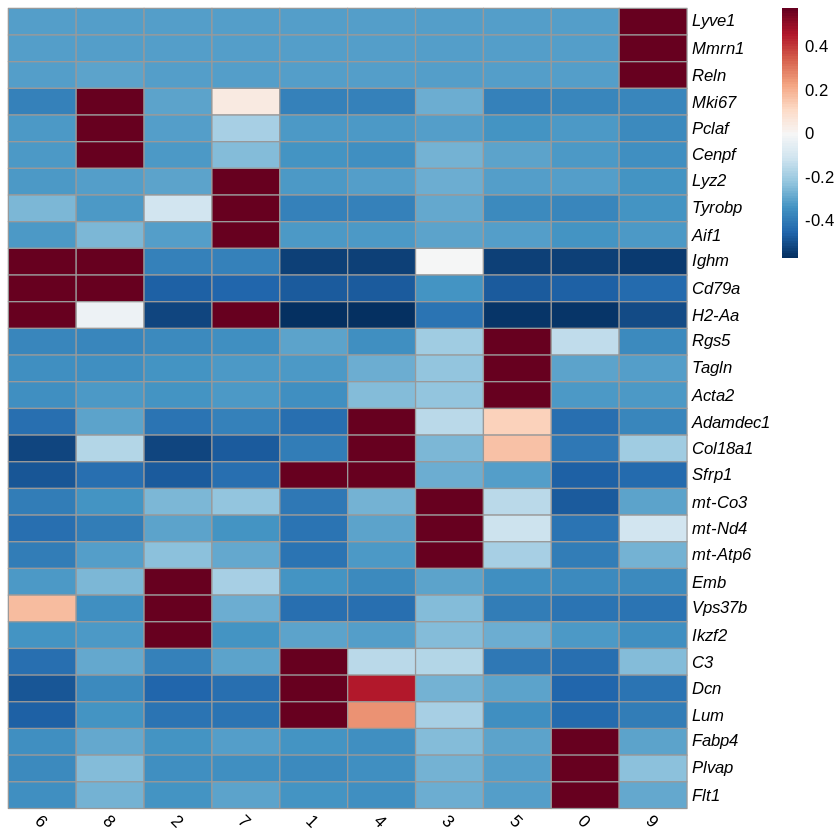

In [30]:
# gene의 상대적 발현값
library(pheatmap)
library(RColorBrewer)

avgExprs <- AverageExpression(seurat,
                              features = unlist(marker.genes),
                              assays = "RNA", slot = "data") # cluster별로 average값을 구함.

scaledExprs <- t(scale(t(avgExprs$RNA)))
scaledExprs[scaledExprs > -min(scaledExprs)] <- -min(scaledExprs) # 값이 튀지않게 조절

palette_length = 100
my_color = my_color <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(palette_length)

my_breaks <- c(seq(min(scaledExprs), 0,
                   length.out=ceiling(palette_length/2) + 1),
               seq(max(scaledExprs)/palette_length,
                   max(scaledExprs),
                   length.out=floor(palette_length/2))) # 연속적인 컬러 지정 및 값 조정

pheatmap(scaledExprs,
         cluster_cols = T, cluster_rows = F, clustering_method = "ward.D2",
         treeheight_col = 0,
         breaks = my_breaks, color=my_color,
         labels_row = as.expression(lapply(rownames(scaledExprs), function(a) bquote(italic(.(a))))),
         angle_col = 315)

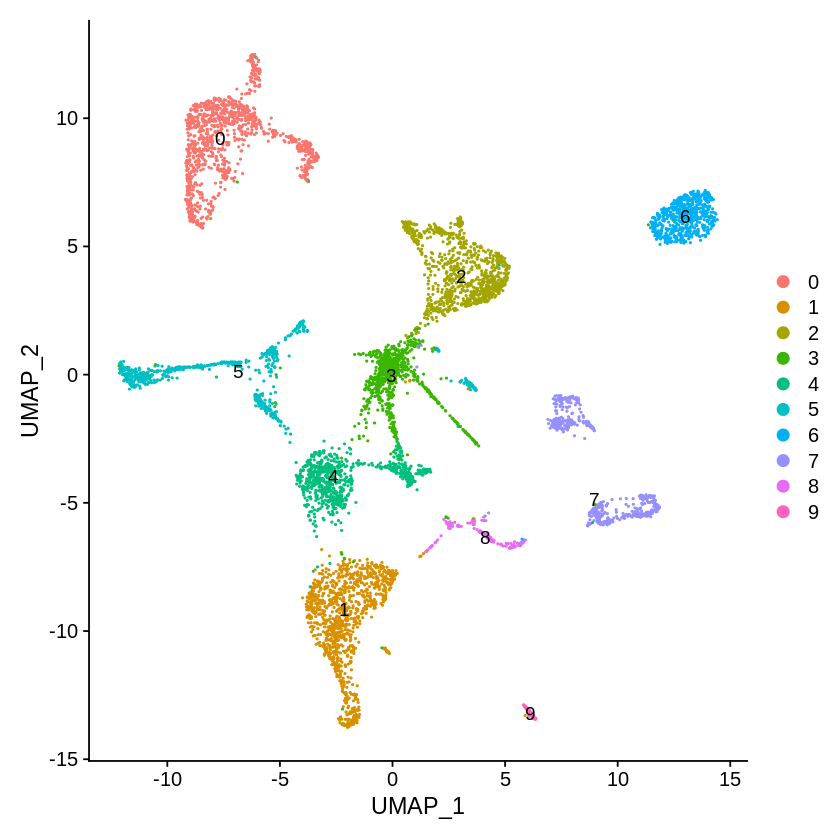

In [77]:
DimPlot(seurat, label=TRUE) # reduction으로 tsne 등 확인 가능

In [90]:
options(repr.plot.width=19, repr.plot.height=5)

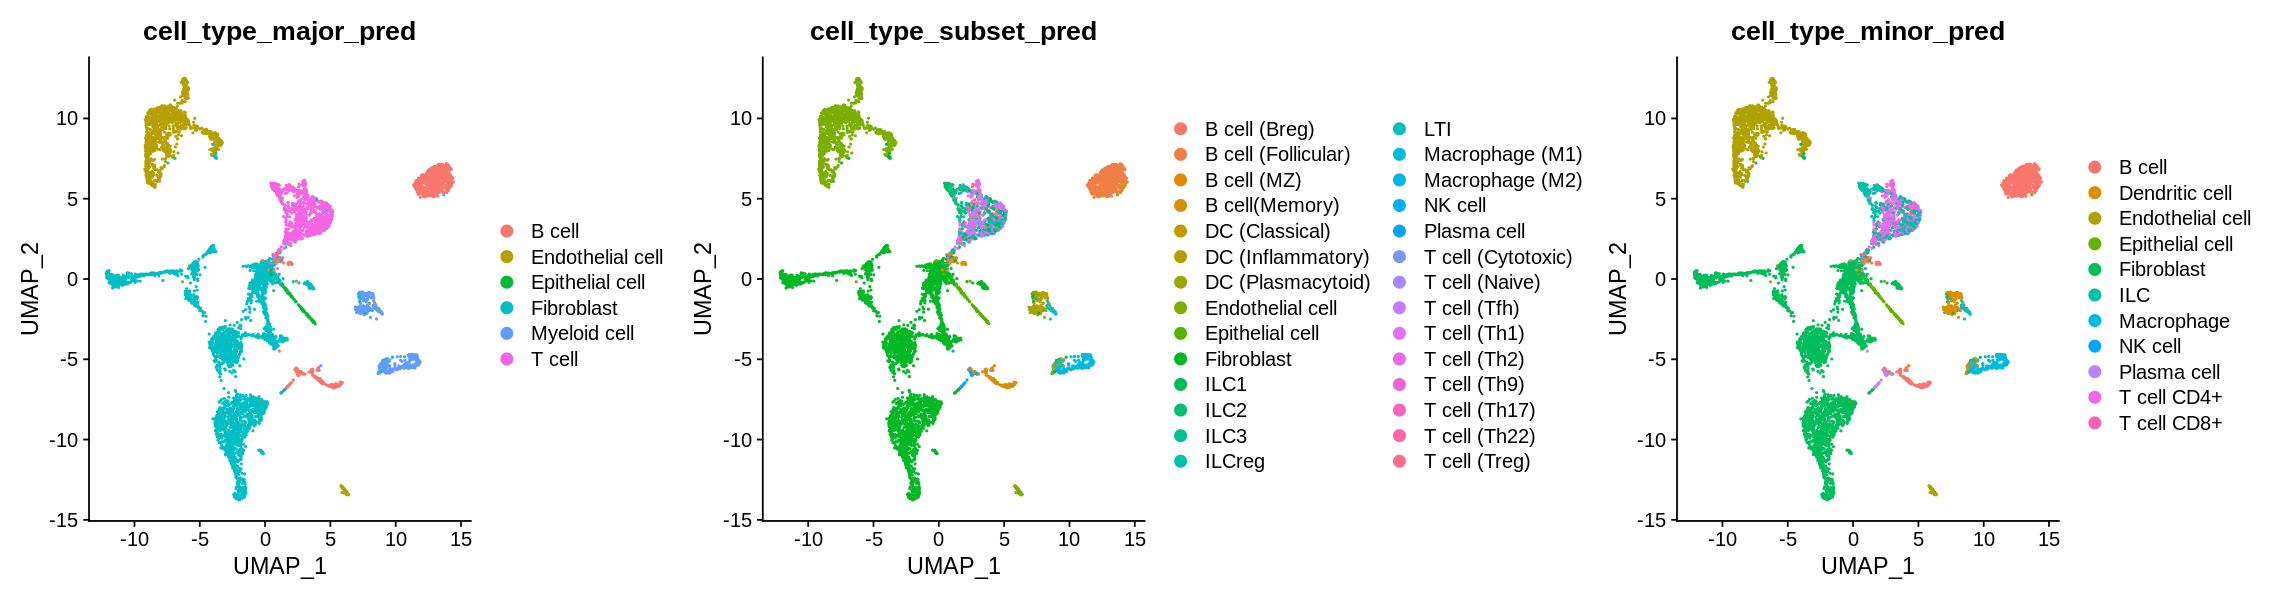

In [91]:
DimPlot(object = seurat, reduction = "umap",
        group.by = c('cell_type_major_pred', 'cell_type_subset_pred', 'cell_type_minor_pred'))

In [65]:
# cluster.celltype <- c("Tcell", "Tcell", "Myeloid", "Epithelial", "Epithelial", "Epithelial", "B cell", "Endothelial", "Fibroblast", "Fibroblast", "Unknown", "Myeloid")
# names(cluster.celltype) <- levels(seurat)
# seurat <- RenameIdents(seurat, cluster.celltype)

Warning message:
"Cannot find identity NA"
Warning message:
"Cannot find identity NA"


In [79]:
seurat@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,Sample.ID,n_genes,cell_type_subset_pred,cell_type_minor_pred,cell_type_major_pred,RNA_snn_res.0.1,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCCACAACAAGTA-1,SeuratProject,500,332,AcuteColitis1,332,Fibroblast,Fibroblast,Fibroblast,3,3
AAACCCACAACGTAAA-1,SeuratProject,1537,813,AcuteColitis1,813,ILC2,ILC,T cell,2,2
AAACCCAGTCACCGAC-1,SeuratProject,5615,2073,AcuteColitis1,2075,B cell (Follicular),B cell,B cell,6,6
AAACCCAGTCAGCGTC-1,SeuratProject,2340,1081,AcuteColitis1,1081,B cell(Memory),B cell,B cell,8,8
AAACCCAGTCGAAGCA-1,SeuratProject,5120,1828,AcuteColitis1,1830,T cell (Cytotoxic),T cell CD8+,T cell,2,2
AAACCCAGTGGACCTC-1,SeuratProject,19520,4197,AcuteColitis1,4200,Fibroblast,Fibroblast,Fibroblast,4,4
AAACCCAGTGGGCTCT-1,SeuratProject,4681,1649,AcuteColitis1,1649,Endothelial cell,Endothelial cell,Endothelial cell,0,0
AAACCCAGTTCGTTCC-1,SeuratProject,2448,967,AcuteColitis1,967,Fibroblast,Fibroblast,Fibroblast,4,4
AAACCCATCCGAGGCT-1,SeuratProject,5471,218,AcuteColitis1,218,Epithelial cell,Epithelial cell,Epithelial cell,3,3


In [92]:
seurat@meta.data$cell_type_minor_pred

[1] Fibroblast       ILC              B cell           B cell          
   [5] T cell CD8+      Fibroblast       Endothelial cell Fibroblast      
   [9] Epithelial cell  Endothelial cell Endothelial cell ILC             
  [13] ILC              Fibroblast       Endothelial cell Macrophage      
  [17] Fibroblast       Fibroblast       ILC              Fibroblast      
  [21] Macrophage       Fibroblast       Endothelial cell Fibroblast      
  [25] Fibroblast       Fibroblast       Fibroblast       B cell          
  [29] ILC              B cell           Fibroblast       Endothelial cell
  [33] Dendritic cell   Fibroblast       Fibroblast       Fibroblast      
  [37] Fibroblast       Fibroblast       Epithelial cell  Fibroblast      
  [41] Fibroblast       Fibroblast       Fibroblast       Fibroblast      
  [45] Fibroblast       T cell CD4+      Fibroblast       B cell          
  [49] Endothelial cell B cell           Fibroblast       Macrophage      
  [53] Dendritic cell   T cell CD4+      Endothelial cell Fibroblast      
  [57] Endothelial cell Fibroblast       Dendritic cell   Endothelial cell
  [61] Fibroblast       Fibroblast       B cell           Fibroblast      
  [65] Dendritic cell   B cell           Fibroblast       Fibroblast      
  [69] ILC              Fibroblast       Fibroblast       Fibroblast      
  [73] Fibroblast       ILC              Macrophage       Fibroblast      
  [77] Macrophage       Fibroblast       ILC              Fibroblast      
  [81] Endothelial cell Fibroblast       Epithelial cell  ILC             
  [85] B cell           Fibroblast       Endothelial cell Fibroblast      
  [89] Dendritic cell   ILC              Fibroblast       B cell          
  [93] Fibroblast       Fibroblast       Fibroblast       Fibroblast      
  [97] Fibroblast       Fibroblast       T cell CD4+      Epithelial cell 
 [101] Fibroblast       ILC              Endothelial cell Dendritic cell  
 [105] ILC              Dendritic cell   Fibroblast       Fibroblast      
 [109] Fibroblast       Fibroblast       T cell CD4+      Fibroblast      
 [113] Macrophage       Fibroblast       Endothelial cell B cell          
 [117] Fibroblast       Epithelial cell  ILC              Fibroblast      
 [121] Fibroblast       Macrophage       ILC              ILC             
 [125] Endothelial cell Fibroblast       B cell           Endothelial cell
 [129] Fibroblast       Endothelial cell Fibroblast       B cell          
 [133] Endothelial cell T cell CD4+      T cell CD4+      Macrophage      
 [137] Fibroblast       Fibroblast       Fibroblast       ILC             
 [141] B cell           Fibroblast       Endothelial cell Fibroblast      
 [145] Fibroblast       B cell           Fibroblast       B cell          
 [149] B cell           B cell           Fibroblast       Fibroblast      
 [153] Fibroblast       Fibroblast       Endothelial cell Fibroblast      
 [157] Fibroblast       T cell CD4+      Fibroblast       Endothelial cell
 [161] Endothelial cell Endothelial cell Macrophage       Endothelial cell
 [165] Fibroblast       Epithelial cell  Fibroblast       Fibroblast      
 [169] Fibroblast       ILC              B cell           Fibroblast      
 [173] T cell CD4+      Fibroblast       Macrophage       Fibroblast      
 [177] B cell           Fibroblast       Endothelial cell Plasma cell     
 [181] Macrophage       Endothelial cell Fibroblast       ILC             
 [185] Fibroblast       Macrophage       T cell CD4+      Endothelial cell
 [189] Fibroblast       ILC              B cell           Endothelial cell
 [193] Fibroblast       B cell           Fibroblast       Fibroblast      
 [197] Endothelial cell Fibroblast       Fibroblast       Dendritic cell  
 [201] Fibroblast       T cell CD4+      Endothelial cell Macrophage      
 [205] T cell CD4+      Fibroblast       Fibroblast       Fibroblast      
 [209] Fibroblast       Fibroblast       ILC              Endothelial cell
 [213] Fibroblast       ILC 

In [97]:
seurat@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,Sample.ID,n_genes,cell_type_subset_pred,cell_type_minor_pred,cell_type_major_pred,RNA_snn_res.0.1,seurat_clusters
,<fct>,<dbl>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCCACAACAAGTA-1,SeuratProject,500,332,AcuteColitis1,332,Fibroblast,Fibroblast,Fibroblast,3,3
AAACCCACAACGTAAA-1,SeuratProject,1537,813,AcuteColitis1,813,ILC2,ILC,T cell,2,2
AAACCCAGTCACCGAC-1,SeuratProject,5615,2073,AcuteColitis1,2075,B cell (Follicular),B cell,B cell,6,6
AAACCCAGTCAGCGTC-1,SeuratProject,2340,1081,AcuteColitis1,1081,B cell(Memory),B cell,B cell,8,8
AAACCCAGTCGAAGCA-1,SeuratProject,5120,1828,AcuteColitis1,1830,T cell (Cytotoxic),T cell CD8+,T cell,2,2
AAACCCAGTGGACCTC-1,SeuratProject,19520,4197,AcuteColitis1,4200,Fibroblast,Fibroblast,Fibroblast,4,4
AAACCCAGTGGGCTCT-1,SeuratProject,4681,1649,AcuteColitis1,1649,Endothelial cell,Endothelial cell,Endothelial cell,0,0
AAACCCAGTTCGTTCC-1,SeuratProject,2448,967,AcuteColitis1,967,Fibroblast,Fibroblast,Fibroblast,4,4
AAACCCATCCGAGGCT-1,SeuratProject,5471,218,AcuteColitis1,218,Epithelial cell,Epithelial cell,Epithelial cell,3,3


In [102]:
str(seurat)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:13122466] 6 95 147 186 257 294 322 341 666 698 ...
  .. .. .. .. .. ..@ p       : int [1:6595] 0 332 1145 3218 4299 6127 10324 11973 12940 13158 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 18988 6594
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:18988] "Xkr4" "Gm19938" "Sox17" "Gm37587" ...
  .. .. .. .. .. .. ..$ : chr [1:6594] "AAACCCACAACAAGTA-1" "AAACCCACAACGTAAA-1" "AAACCCAGTCACCGAC-1" "AAACCCAGTCAGCGTC-1" ...
  .. .. .. .. .. ..@ x       : num [1:13122466] 1 1 1 2 1 1 2 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:13122466] 6 95 147 186 257 294 32

In [124]:
Idents(seurat)

AAACCCACAACAAGTA-1 AAACCCACAACGTAAA-1 AAACCCAGTCACCGAC-1 AAACCCAGTCAGCGTC-1 
        Fibroblast                ILC             B cell             B cell 
AAACCCAGTCGAAGCA-1 AAACCCAGTGGACCTC-1 AAACCCAGTGGGCTCT-1 AAACCCAGTTCGTTCC-1 
       T cell CD8+         Fibroblast   Endothelial cell         Fibroblast 
AAACCCATCCGAGGCT-1 AAACCCATCGAGTGGA-1 AAACCCATCTGCTTAT-1 AAACCCATCTTCGTAT-1 
   Epithelial cell   Endothelial cell   Endothelial cell                ILC 
AAACGAACAGGTCCCA-1 AAACGAAGTATGCGGA-1 AAACGAAGTCCTATAG-1 AAACGAATCAAGCGTT-1 
               ILC         Fibroblast   Endothelial cell         Macrophage 
AAACGAATCATGGGAG-1 AAACGAATCCGTGGCA-1 AAACGAATCGCTCCTA-1 AAACGCTAGAAGAGCA-1 
        Fibroblast         Fibroblast                ILC         Fibroblast 
AAACGCTAGGCACTCC-1 AAACGCTAGGGAACAA-1 AAACGCTCAACCGCCA-1 AAACGCTCACCAAAGG-1 
        Macrophage         Fibroblast   Endothelial cell         Fibroblast 
AAACGCTCACCCTAGG-1 AAACGCTCAGATTAAG-1 AAACGCTGTAATGCTC-1 AAACGCTGTCAAATCC-1 
        Fibroblast         Fibroblast         Fibroblast             B cell 
AAACGCTGTCGCTCGA-1 AAACGCTGTGTGGTCC-1 AAACGCTTCCACGGGT-1 AAAGAACAGAAGCCAC-1 
               ILC             B cell         Fibroblast   Endothelial cell 
AAAGAACAGAGTTGTA-1 AAAGAACAGGGCCTCT-1 AAAGAACAGGTAGCCA-1 AAAGAACAGTCACACT-1 
    Dendritic cell         Fibroblast         Fibroblast         Fibroblast 
AAAGAACCACGTCTCT-1 AAAGAACTCCATTTCA-1 AAAGGATCACCTTCGT-1 AAAGGATCACGACCTG-1 
        Fibroblast         Fibroblast    Epithelial cell         Fibroblast 
AAAGGATCAGAGGCTA-1 AAAGGATCATTGTGCA-1 AAAGGATGTACCTAGT-1 AAAGGATGTCGAACGA-1 
        Fibroblast         Fibroblast         Fibroblast         Fibroblast 
AAAGGATGTCGCCTAG-1 AAAGGATTCGCATTGA-1 AAAGGGCCAGACCCGT-1 AAAGGGCCATAATGCC-1 
        Fibroblast        T cell CD4+         Fibroblast             B cell 
AAAGGGCGTCATCTAG-1 AAAGGGCGTCCCTGAG-1 AAAGGGCGTTCATCTT-1 AAAGGTACAAATGGCG-1 
  Endothelial cell             B cell         Fibroblast         Macrophage 
AAAGGTACAGAGCCCT-1 AAAGGTACAGTGTGGA-1 AAAGGTACATACTGAC-1 AAAGGTAGTGCCTAAT-1 
    Dendritic cell        T cell CD4+   Endothelial cell         Fibroblast 
AAAGGTAGTTCGGACC-1 AAAGGTATCACACCGG-1 AAAGGTATCATGGTAC-1 AAAGGTATCCGATGCG-1 
  Endothelial cell         Fibroblast     Dendritic cell   Endothelial cell 
AAAGGTATCTGACAGT-1 AAAGTCCAGACAAGCC-1 AAAGTCCAGCAGCCTC-1 AAAGTCCAGGTTAAAC-1 
        Fibroblast         Fibroblast             B cell         Fibroblast 
AAAGTCCCAAAGGCTG-1 AAAGTCCCAGCGTACC-1 AAAGTCCCAGTGAGCA-1 AAAGTCCTCACCATCC-1 
    Dendritic cell             B cell         Fibroblast         Fibroblast 
AAAGTCCTCGAACCTA-1 AAAGTGACAAATGAGT-1 AAAGTGAGTAATTAGG-1 AAAGTGAGTCGAATTC-1 
               ILC         Fibroblast         Fibroblast         Fibroblast 
AAAGTGAGTTTACTTC-1 AAAGTGATCCCGAAAT-1 AAAGTGATCTAGTCAG-1 AAAGTGATCTGAGAAA-1 
        Fibroblast                ILC         Macrophage         Fibroblast 
AAATGGAAGAGATTCA-1 AAATGGAAGCAAACAT-1 AAATGGAAGCGACTGA-1 AAATGGAAGCGTACAG-1 
        Macrophage         Fibroblast                ILC         Fibroblast 
AAATGGACAAGATCCT-1 AAATGGACATACGCAT-1 AAATGGAGTCATAGTC-1 AAATGGATCATTGCGA-1 
  Endothelial cell         Fibroblast    Epithelial cell                ILC 
AAATGGATCCTTCTGG-1 AACAAAGAGAGCACTG-1 AACAAAGAGTTGTAAG-1 AACAAAGCATCTAGAC-1 
            B cell         Fibroblast   Endothelial cell         Fibroblast 
AACAAAGCATGTACGT-1 AACAAAGGTTCGCGTG-1 AACAAAGTCAACACGT-1 AACAAAGTCACAATGC-1 
    Dendritic cell                ILC         Fibroblast             B cell 
AACAACCAGCGATGAC-1 AACAACCAGGTTAGTA-1 AACAACCCAGATCCTA-1 AACAACCCATGGGTCC-1 
        Fibroblast         Fibroblast         Fibroblast         Fibroblast 
AACAACCTCCTCGCAT-1 AACAACCTCGCGTAGC-1 AACAACCTCGTCGACG-1 AACAAGAAGTCACGCC-1 
        Fibroblast         Fibroblast        T cell CD4+    Epithelial cell 
AACAAGACAACCAGAG-1 AACAAGACAAGTCCCG-1 AACAAGACAAGTGGCA-1 AACAAGACAAGTGTCT-1 
        Fibroblast                ILC   Endothelial cell     Dendritic ce

In [122]:
Idents(seurat) <- "cell_type_minor_pred"

In [123]:
SetIdent(object = seurat, ident.use = seurat@meta.data$cell_type_minor_pred) 

Warning message:
"The following arguments are not used: ident.use"


ERROR: Error in SetIdent.Seurat(object = seurat, ident.use = seurat@meta.data$cell_type_minor_pred): argument "value" is missing, with no default


In [115]:
seurat <- RenameIdents(seurat, seurat@meta.data$cell_type_minor_pred)

ERROR: Error in RenameIdents.Seurat(seurat, seurat@meta.data$cell_type_minor_pred): All arguments must be named with the old identity class


In [125]:
markers.min.gene <- FindAllMarkers(seurat, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster B cell

Calculating cluster Dendritic cell

Calculating cluster Endothelial cell

Calculating cluster Epithelial cell

Calculating cluster Fibroblast

Calculating cluster ILC

Calculating cluster Macrophage

Calculating cluster NK cell

Calculating cluster Plasma cell

Calculating cluster T cell CD4+

Calculating cluster T cell CD8+



In [126]:
markers.min.gene

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Ighm,0,3.684535,0.815,0.163,0,B cell,Ighm
Cd79a,0,3.154276,0.858,0.036,0,B cell,Cd79a
Cd74,0,2.865579,0.970,0.471,0,B cell,Cd74
H2-Aa,0,2.849989,0.926,0.332,0,B cell,H2-Aa
Dmxl1,0,2.693227,0.770,0.225,0,B cell,Dmxl1
H2-Ab1,0,2.564674,0.924,0.321,0,B cell,H2-Ab1
Stap1,0,2.543343,0.712,0.046,0,B cell,Stap1
H2-Eb1,0,2.434182,0.918,0.237,0,B cell,H2-Eb1
Cd79b,0,2.396030,0.614,0.032,0,B cell,Cd79b


In [183]:
for(i in unique(markers.min.gene$cluster)){
    print(i)
    cluster <- markers.min.gene[,"cluster"] == i
}

[1] "B cell"
[1] "Dendritic cell"
[1] "Endothelial cell"
[1] "Epithelial cell"
[1] "Fibroblast"
[1] "ILC"
[1] "Macrophage"
[1] "NK cell"
[1] "Plasma cell"
[1] "T cell CD4+"
[1] "T cell CD8+"


In [193]:
mincelltypes[12]

[1] <NA>
11 Levels: B cell Dendritic cell Endothelial cell ... T cell CD8+

In [223]:
mincelltypes <- unique(markers.min.gene$cluster)
marker.genes.cluster <- list()

for(i in mincelltypes){
    print(i)
    cluster <- markers.min.gene$cluster == i
    marker.genes.cluster <- append(head(markers.min.gene[cluster,], n = 3)$gene, marker.genes.cluster)
#     marker.genes.cluster[i] <- head(markers.min.gene[cluster,], n = 3)$gene
    
}

[1] "B cell"
[1] "Dendritic cell"
[1] "Endothelial cell"
[1] "Epithelial cell"
[1] "Fibroblast"
[1] "ILC"
[1] "Macrophage"
[1] "NK cell"
[1] "Plasma cell"
[1] "T cell CD4+"
[1] "T cell CD8+"


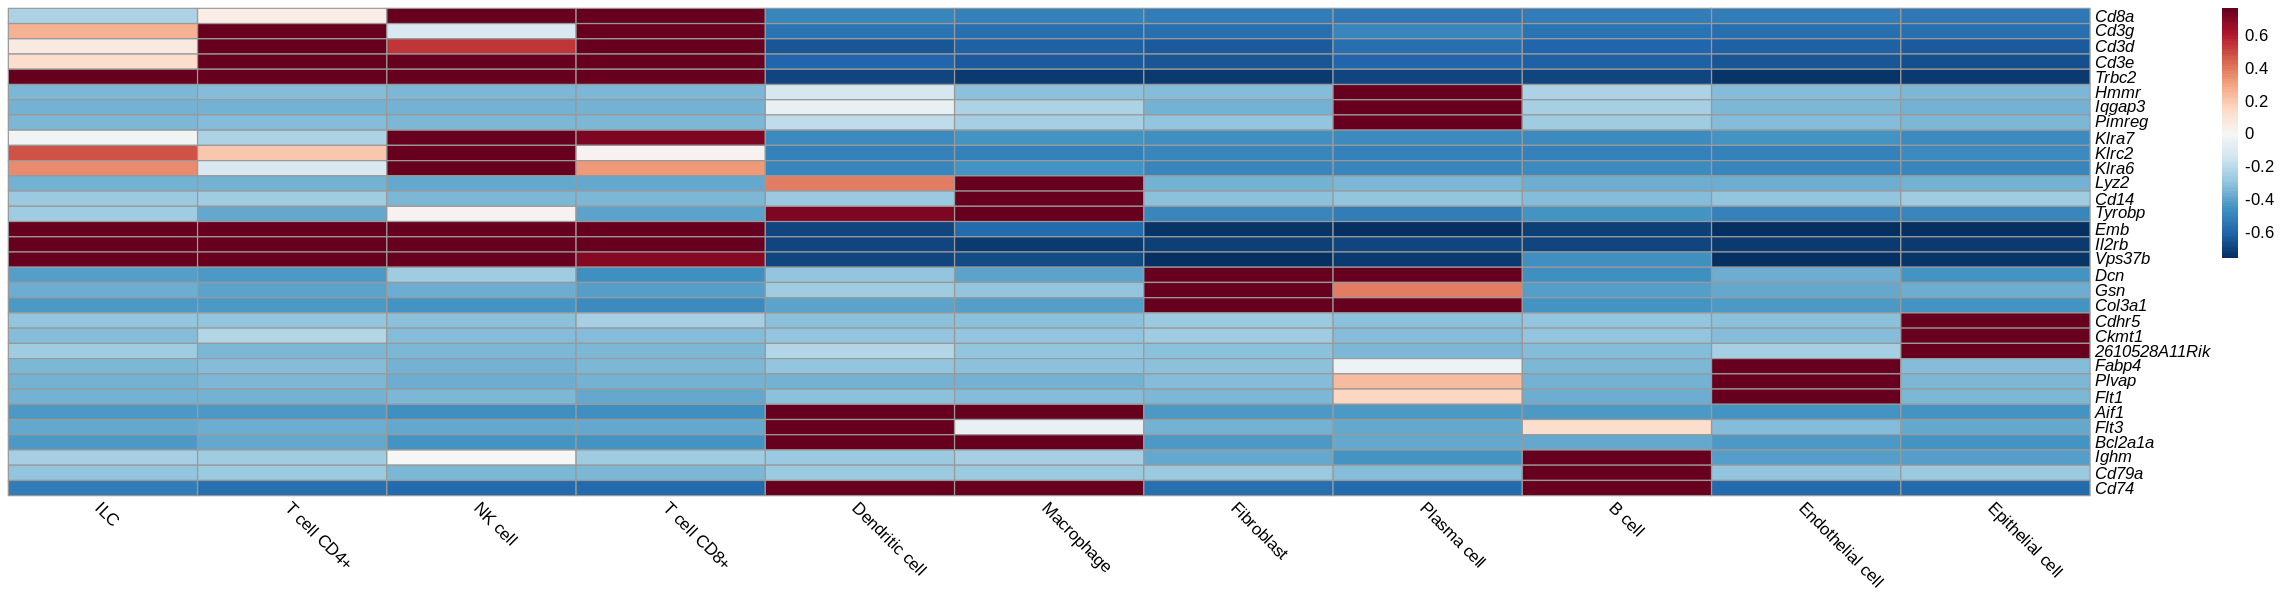

In [231]:
# gene의 상대적 발현값
library(pheatmap)
library(RColorBrewer)

avgExprs <- AverageExpression(seurat,
                              features = unlist(marker.genes.cluster),
                              assays = "RNA", slot = "data") # cluster별로 average값을 구함.

scaledExprs <- t(scale(t(avgExprs$RNA)))
scaledExprs[scaledExprs > -min(scaledExprs)] <- -min(scaledExprs) # 값이 튀지않게 조절

palette_length = 100
my_color = my_color <- colorRampPalette(rev(brewer.pal(11, "RdBu")))(palette_length)

my_breaks <- c(seq(min(scaledExprs), 0,
                   length.out=ceiling(palette_length/2) + 1),
               seq(max(scaledExprs)/palette_length,
                   max(scaledExprs),
                   length.out=floor(palette_length/2))) # 연속적인 컬러 지정 및 값 조정

pheatmap(scaledExprs,
         cluster_cols = T, cluster_rows = F, clustering_method = "ward.D2",
         treeheight_col = 0,
         breaks = my_breaks, color=my_color,
         labels_row = as.expression(lapply(rownames(scaledExprs), function(a) bquote(italic(.(a))))),
         angle_col = 315)

In [241]:
marker.genes.cluster

[[1]]
[1] "Cd8a"

[[2]]
[1] "Cd3g"

[[3]]
[1] "Cd3d"

[[4]]
[1] "Cd3d"

[[5]]
[1] "Cd3e"

[[6]]
[1] "Trbc2"

[[7]]
[1] "Hmmr"

[[8]]
[1] "Iqgap3"

[[9]]
[1] "Pimreg"

[[10]]
[1] "Klra7"

[[11]]
[1] "Klrc2"

[[12]]
[1] "Klra6"

[[13]]
[1] "Lyz2"

[[14]]
[1] "Cd14"

[[15]]
[1] "Tyrobp"

[[16]]
[1] "Emb"

[[17]]
[1] "Il2rb"

[[18]]
[1] "Vps37b"

[[19]]
[1] "Dcn"

[[20]]
[1] "Gsn"

[[21]]
[1] "Col3a1"

[[22]]
[1] "Cdhr5"

[[23]]
[1] "Ckmt1"

[[24]]
[1] "2610528A11Rik"

[[25]]
[1] "Fabp4"

[[26]]
[1] "Plvap"

[[27]]
[1] "Flt1"

[[28]]
[1] "Aif1"

[[29]]
[1] "Flt3"

[[30]]
[1] "Bcl2a1a"

[[31]]
[1] "Ighm"

[[32]]
[1] "Cd79a"

[[33]]
[1] "Cd74"

In [232]:
cell.markers <- as.vector(marker.genes.cluster)

In [245]:
cell.markers <- unique(cell.markers)

Warning message:
"Could not find Cd8a in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Cd3g in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Cd3d in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Cd3e in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Trbc2 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Hmmr in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Iqgap3 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Pimreg in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Klra7 in the default search locations, found in RNA assay instead"
Warning message:
"Could not find Klrc2 in the default search locations, found in RNA assay instead"
War

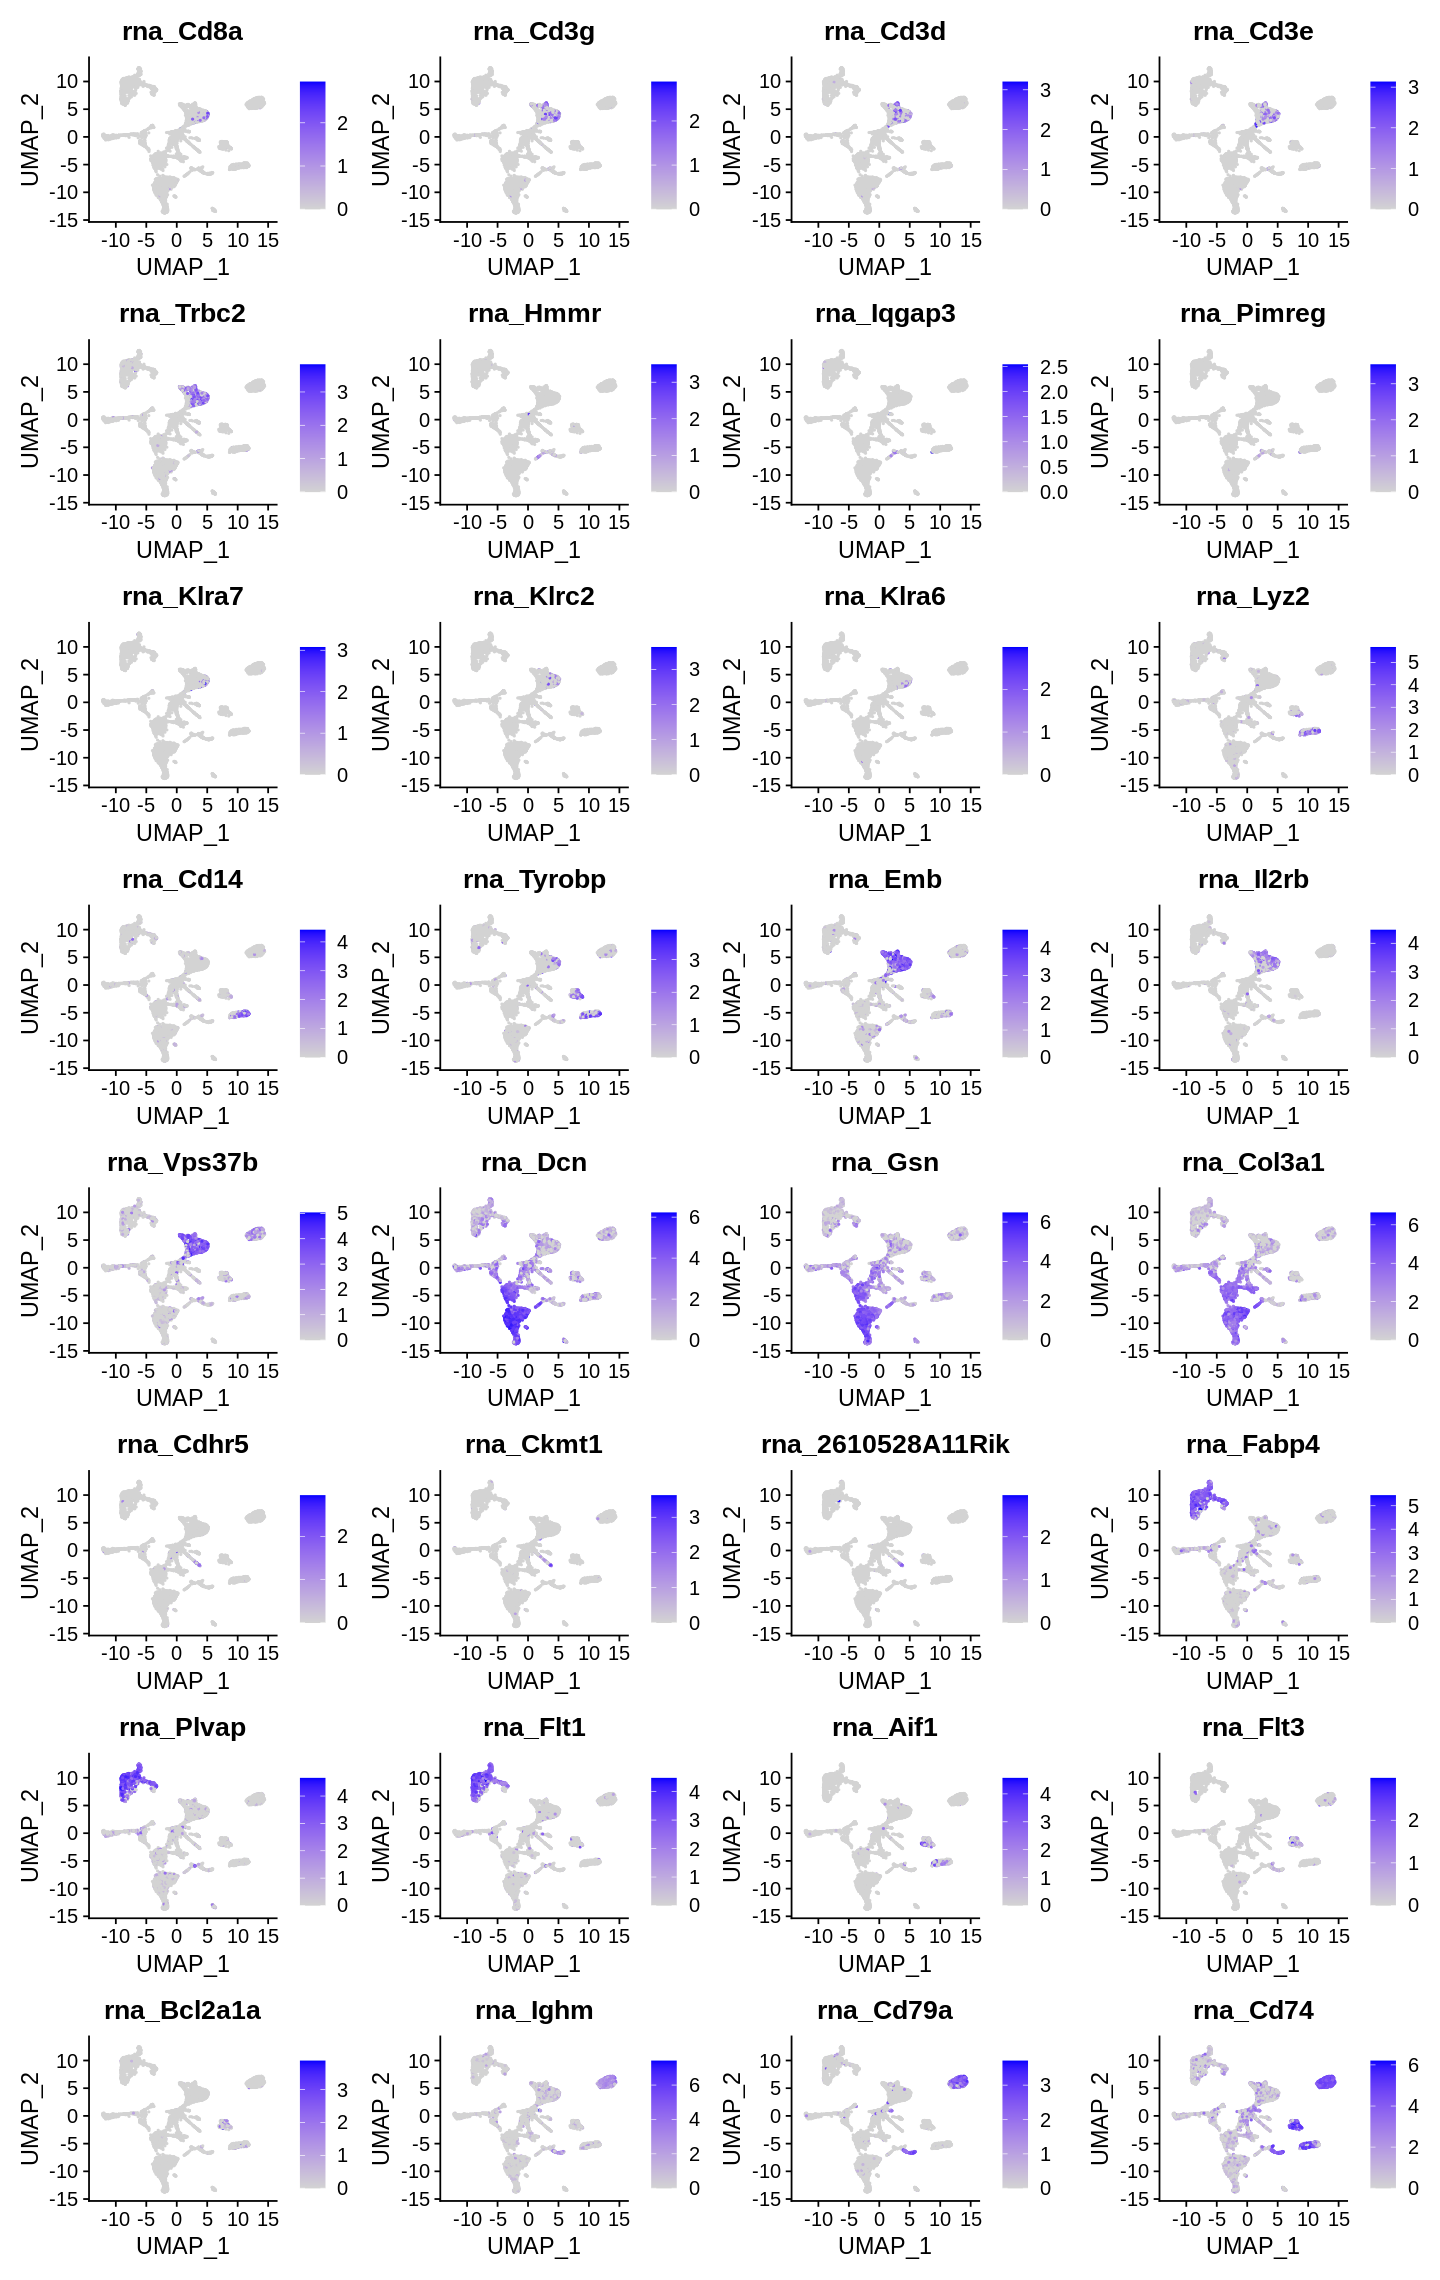

In [248]:
options(repr.plot.width=12, repr.plot.height=19)
FeaturePlot(object = seurat, features = cell.markers)

In [257]:
options(repr.plot.width=10, repr.plot.height=8)

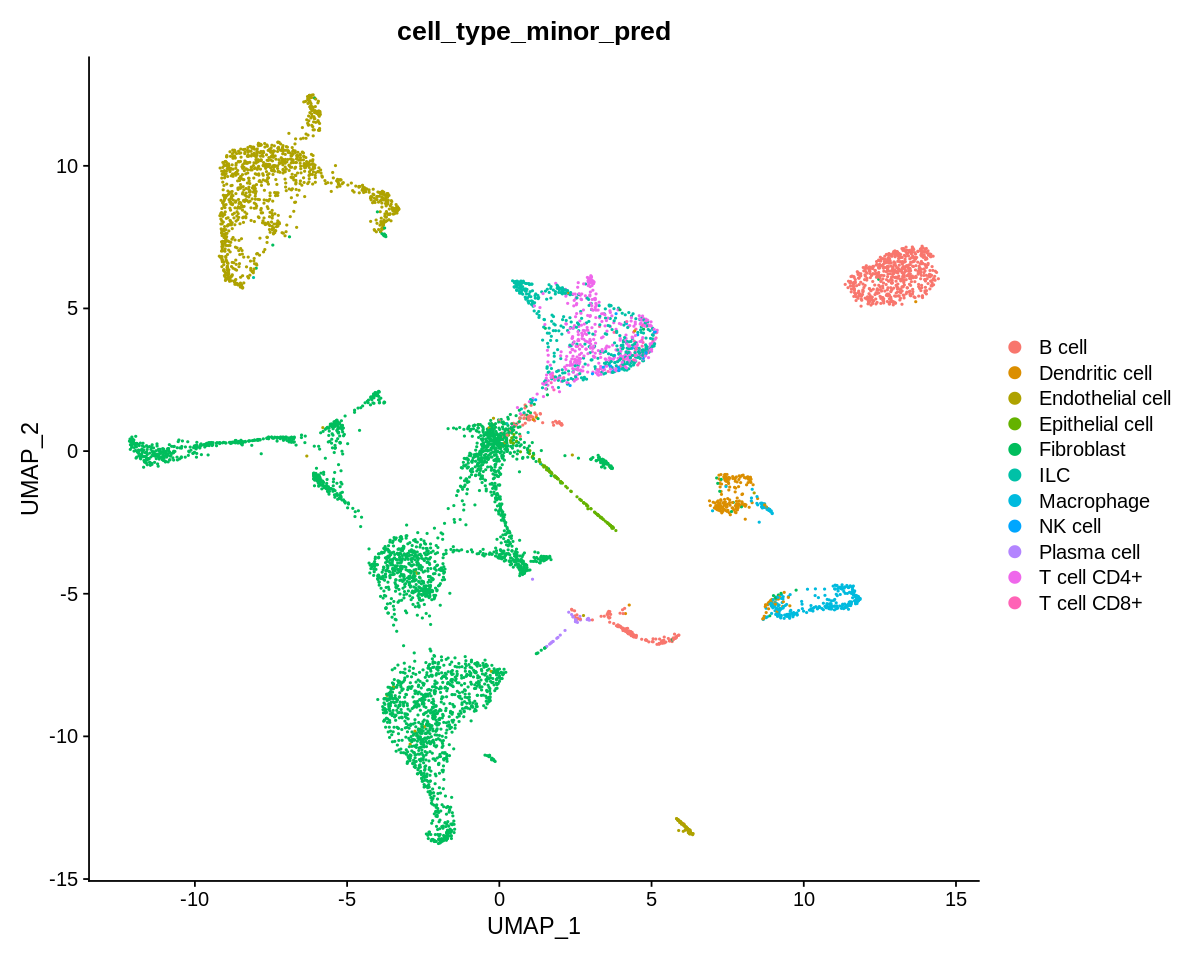

In [258]:
DimPlot(object = seurat, reduction = "umap",
        group.by = c('cell_type_minor_pred'))